In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from scipy.integrate import trapz
from scipy.integrate import dblquad, quad
import scipy
import sys
import spherical
import quaternionic
import sympy as sym 

In [2]:

SMALL_SIZE = 12
MEDIUM_SIZE = 17
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
map_dust= hp.read_map ("/Users/arefe/Projects/ScatteringTransform/COM_CompMap_dust-commrul_2048_R1.00.fits")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arefe/Projects/ScatteringTransform/COM_CompMap_dust-commrul_2048_R1.00.fits'

In [ ]:
nside = 2048
lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [ ]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

In [ ]:
mapsize = hp.nside2npix(nside)
almsize = hp.Alm.getsize(lmax)

In [ ]:
jmax = 11

In [ ]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

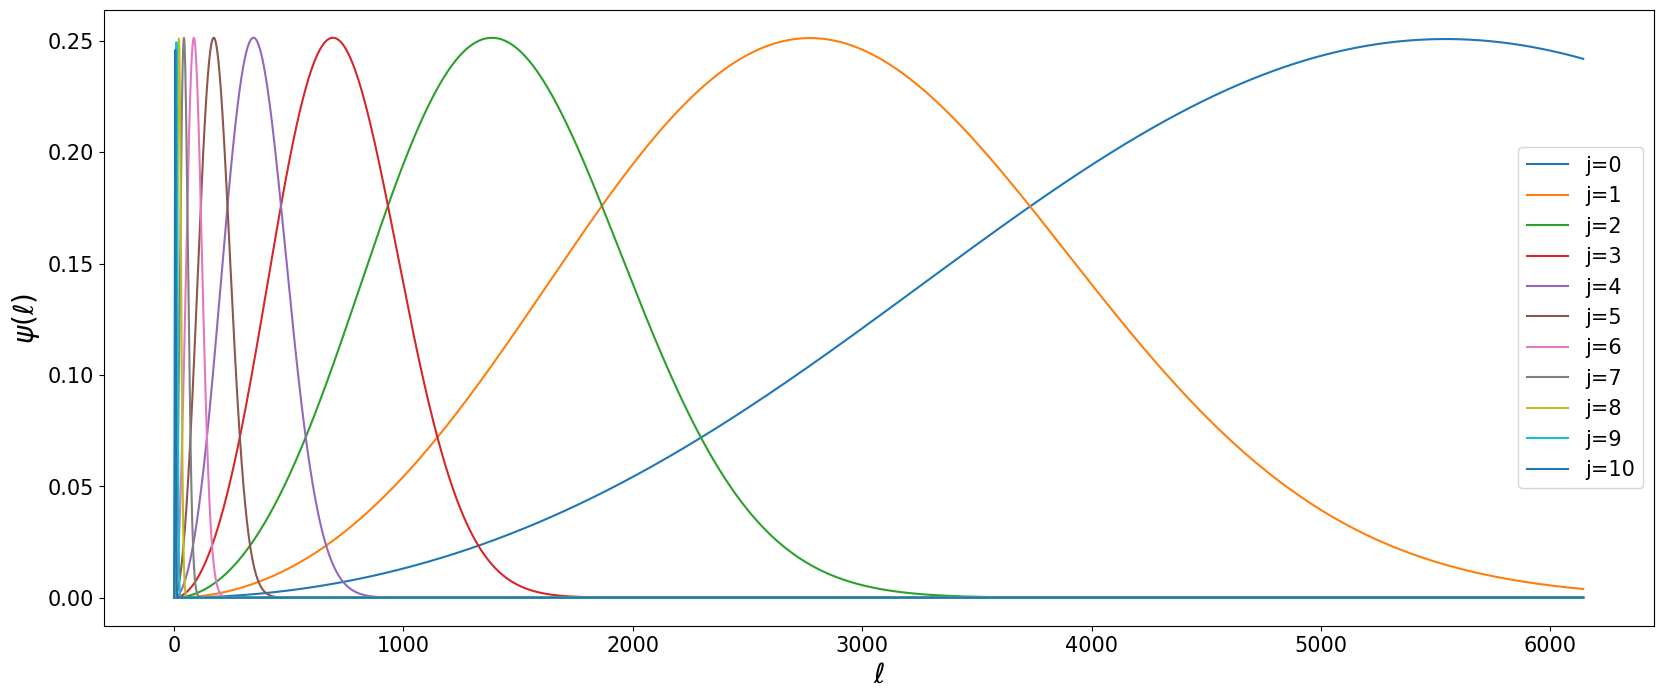

In [80]:
ell = np.arange (lmax+1)
fig=plt.figure(figsize=[20,8])
for j in range(jmax):
    #plt.plot(ell,np.real(morlet_l_arr_prj[j]),label='j='+str(j))
    plt.plot(ell,np.real(morlet_l_arr[j]),label='j='+str(j))
    plt.legend(prop={'size': 15})
    
#plt.yscale("log")
plt.xlabel("$\ell$", size=20)
plt.ylabel("$\psi(\ell)$", size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.savefig("profile.pdf")

In [81]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)


In [82]:
s0 = np.mean(map_dust)

In [83]:
s1, i1 = ST.compS1(map_dust, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [84]:
s2, i2 = ST.compS2(i1, morlet_l_arr, jmax, nside)

0


KeyboardInterrupt: 

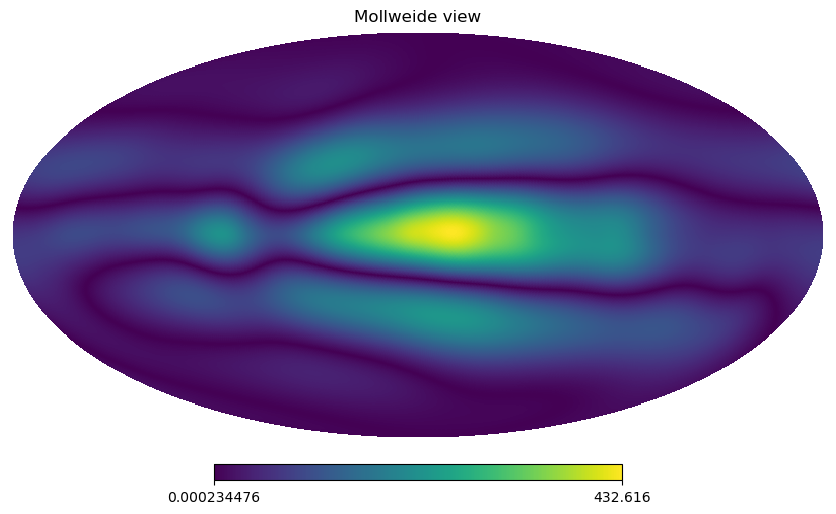

In [54]:
hp.mollview(i1[7])

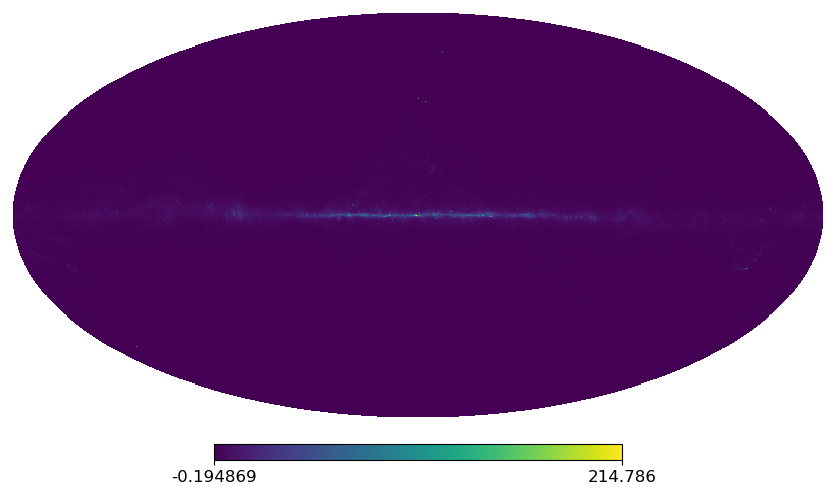

In [92]:
hp.mollview(map_dust, title="")

In [85]:
cl_dust = hp.anafast(map_dust) 
dl_dust = ell*(ell+1)/(2*np.pi)*cl_dust

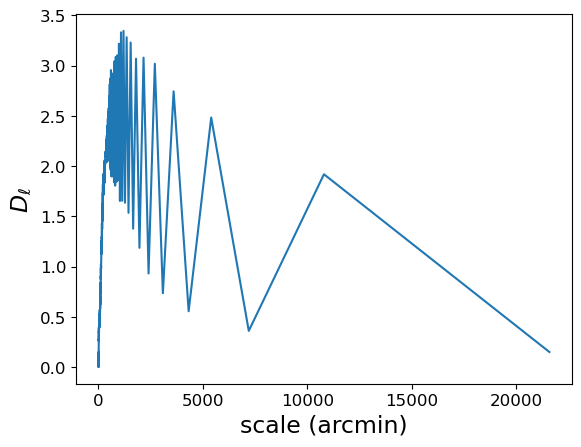

In [89]:
plt.plot (ellsc, dl_dust)
#plt.xlim(0,8000)
plt.xlabel ("scale (arcmin)") 
plt.ylabel (r"$D_\ell$")
plt.savefig ("dust_cl.pdf")

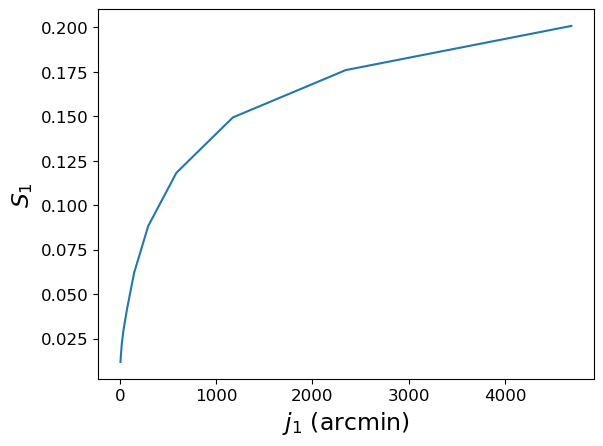

In [91]:
plt.plot (scale, s1)
plt.ylabel(r"$S_1$")
plt.xlabel(r"$j_1$ (arcmin)")
#plt.legend (["MILCA","NILC", "Websky" , "Magneticum" ])
plt.savefig("dust_s1.pdf")

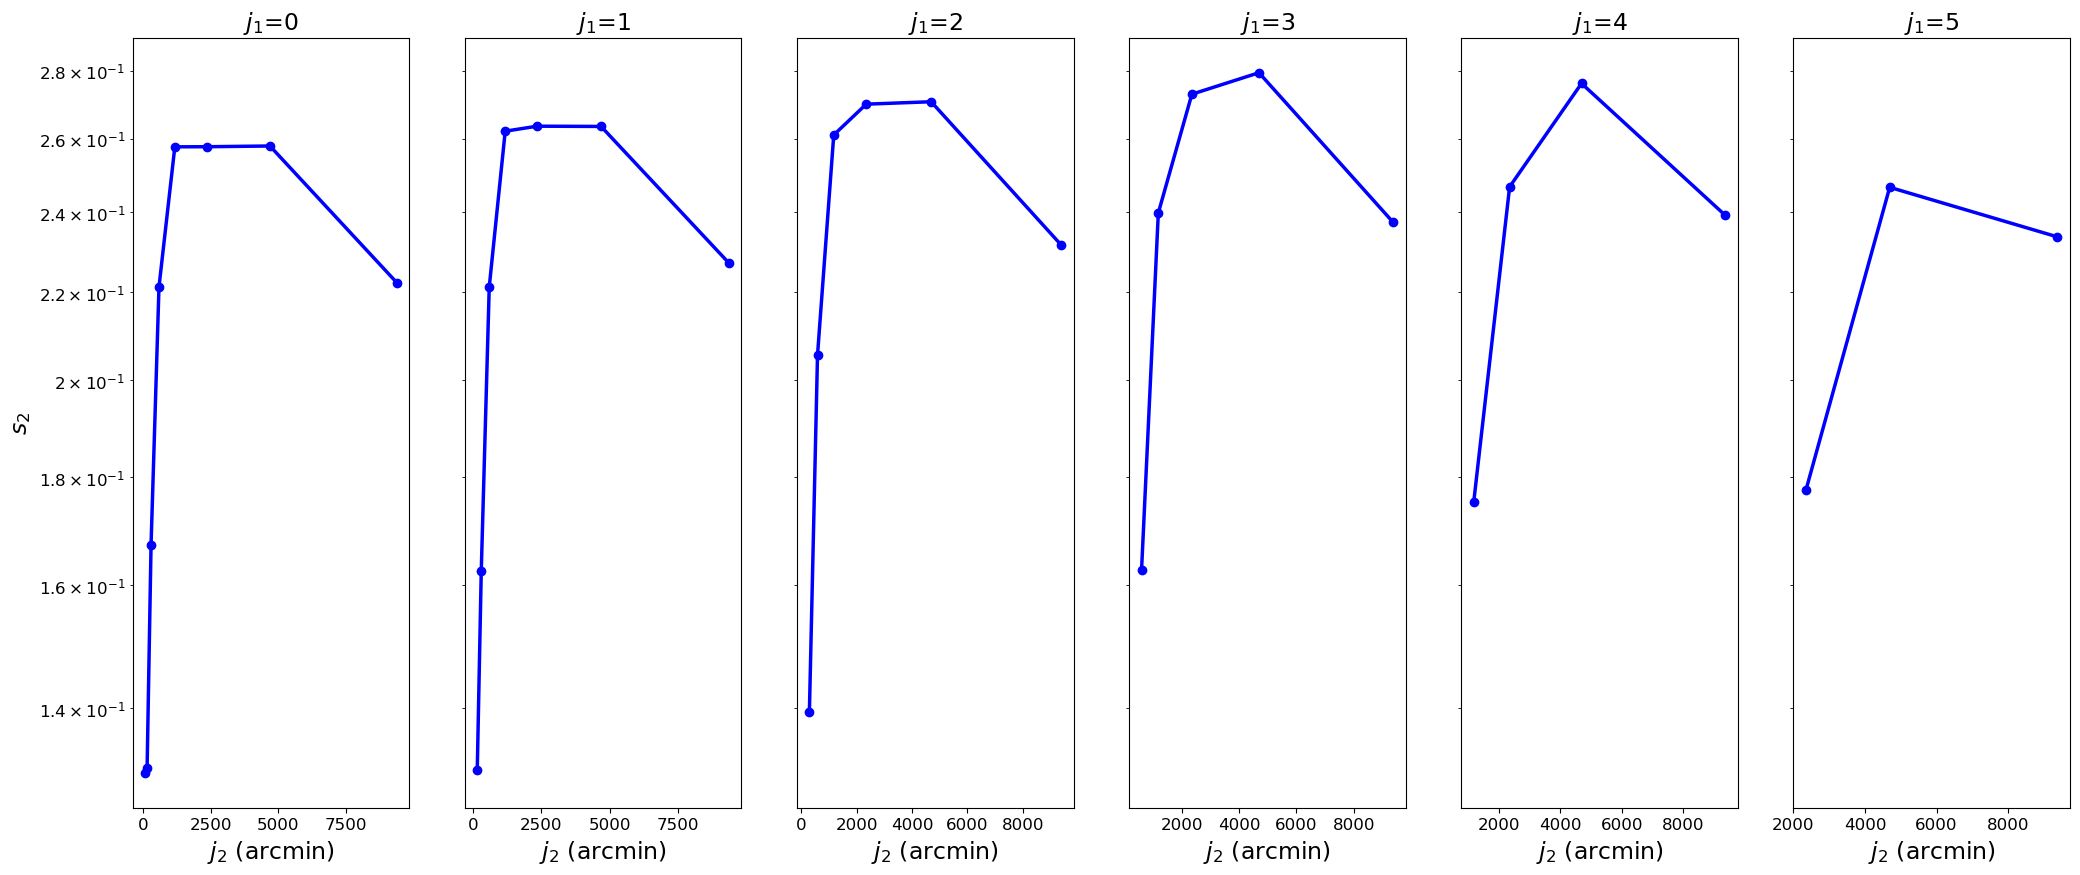

In [64]:
fig, ax = plt.subplots(1, 6,sharey=True,squeeze=True,figsize=(25,10))
for j in range (6):
    ax[j].plot (scale[j+1:],s2[j,j+1:]/s1[j],'o-' , color="blue" , lw = 2.5)
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale,s2[j,:]/s1[j],'o-', alpha = 0.4 , color = "blue")
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ (arcmin)")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
#fig.legend (["MILCA","Websky" , "Magneticum"], loc='upper center')
plt.savefig("dust_s2.pdf")